<a href="https://colab.research.google.com/github/kdemertzis/LNexamples/blob/main/autots_sum_day.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install auto-ts

In [7]:
import pandas as pd
import sys
import os
dev = False  # Set to false when using production version of library
if dev:
    # Path to Dev version of autots library
    sys.path.append(os.environ['DEV_AUTOTS'])
    %load_ext autoreload
    %autoreload 2

from auto_ts import auto_timeseries

# Load Dataset

In [8]:
file_path="https://raw.githubusercontent.com/kdemertzis/datashare/main/sum_day.csv"
dataset = pd.read_csv(file_path, engine='python')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     366 non-null    object
 1   sum_day  366 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [9]:
dataset.head()

,date,sum_day
0,1/8/2015,11619
1,2/8/2015,12451
2,3/8/2015,10160
3,4/8/2015,8114
4,5/8/2015,8857


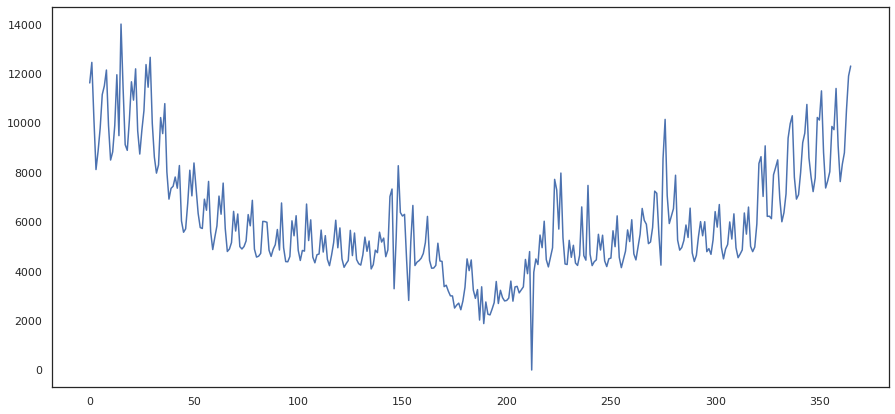

In [10]:
dataset['sum_day'].plot(figsize=(15,7))

# Train Model

In [11]:
ts_column = 'date'
target = 'sum_day'
sep = ','

In [12]:
FORECAST_PERIOD = 168

In [13]:
model = auto_timeseries(score_type='rmse',
                time_interval='M',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['best'],
                verbose=2)

Start of Fit.....
Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Results of Augmented Dickey-Fuller Test:
+-----------------------------+------------------------------+
|                             | Dickey-Fuller Augmented Test |
+-----------------------------+------------------------------+
|        Test Statistic       |     -1.3527576617876507      |
|           p-value           |      0.6047036614656747      |
|          #Lags Used         |             7.0              |
| Number of Observations Used |            358.0             |
|     Critical Value (1%)     |      -3.448748905151901      |
|     Critical Value (5%)     |     -2.8696473721448728      |
|     Critical Value (10%)    |     -2.5710891239349585      |
+-----------------------------+------------------------------+
 this series is non-stationary. Trying test again after differencing...
After differencing=1, results of Augmented Dickey-Fuller Test:
+-----------------

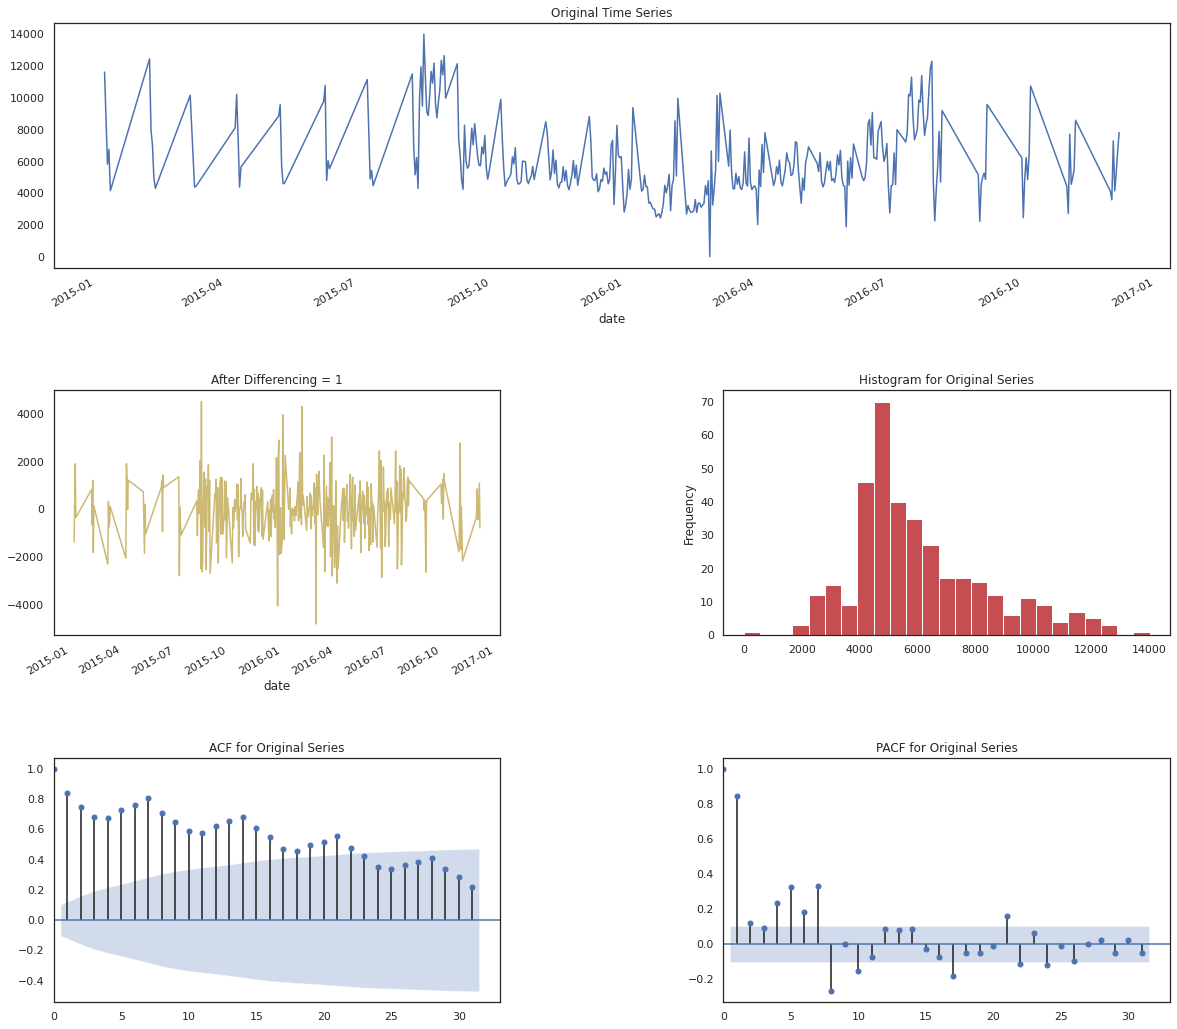

Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
    Fit-Predict data (shape=(366, 2)) with Confidence Interval = 0.95...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 3

Fold Number: 1 --> Train Shape: 351 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 3,426.87
    Std Deviation of actuals = 1,417.64
    Normalized RMSE = 242%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 356 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 3,984.01
    Std Deviation of actuals = 1,221.53
    Normalized RMSE = 326%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 361 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 4,213.11
    Std Deviation of actuals 

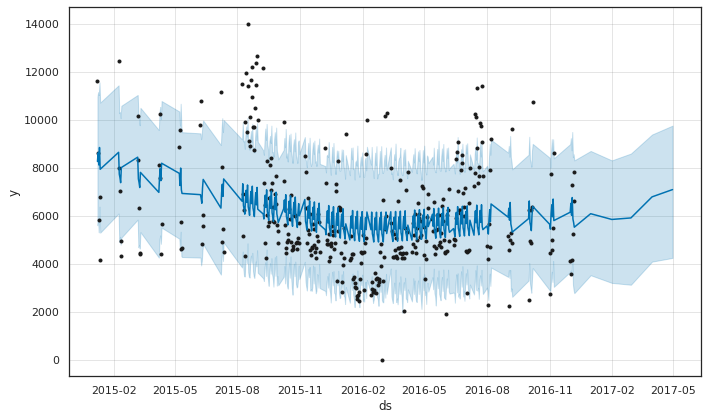

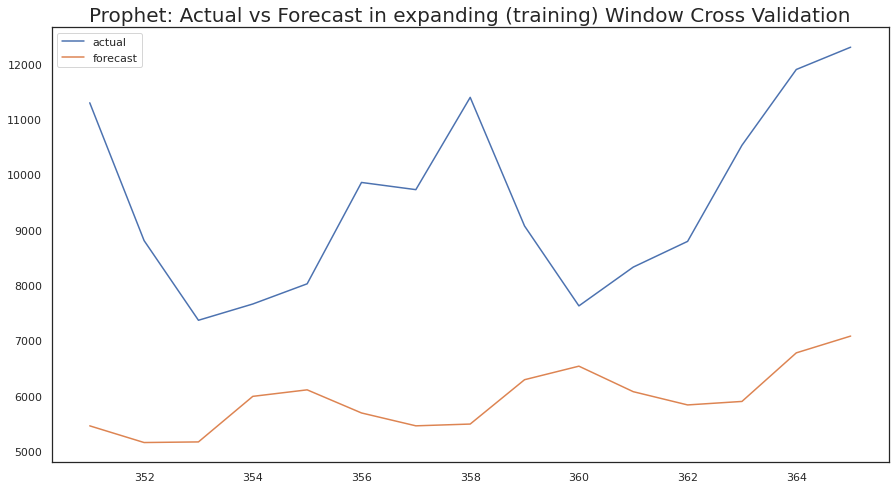

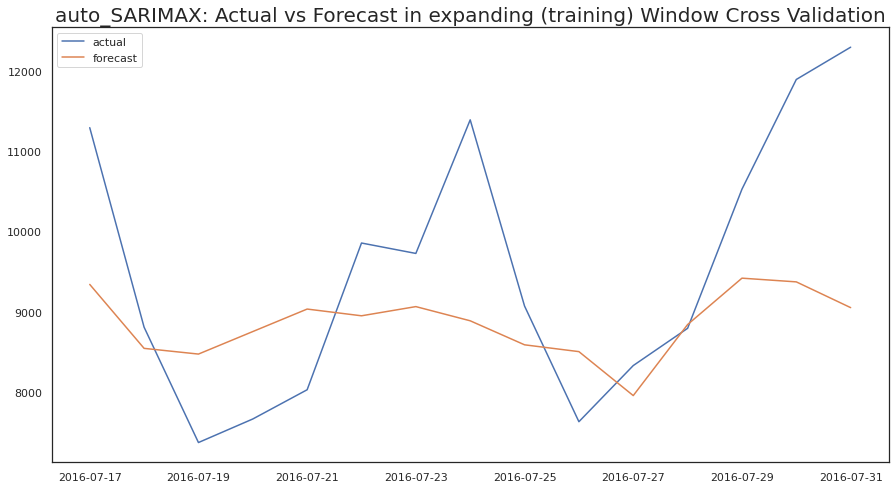

In [14]:
model.fit(
    traindata=dataset,
    # traindata=file_path,  # Alternately, you can specify the file directly
    ts_column=ts_column,
    target=target,
    cv=3,
    sep=sep)        

# Evaluate Results

In [15]:
model.get_leaderboard()

,name,rmse
1,auto_SARIMAX,1478.011216
0,Prophet,3874.664528
2,VAR,inf
3,ML,inf


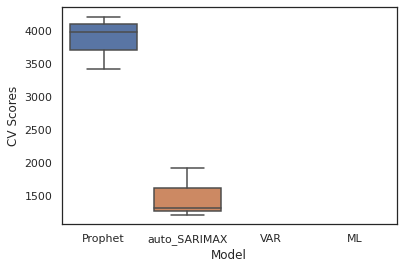

In [16]:
model.plot_cv_scores()

In [17]:
# Make sure all models have the same number of CV folds
model.get_cv_scores()

,Model,CV Scores
0,Prophet,3426.872410
1,Prophet,3984.006213
2,Prophet,4213.114961
3,auto_SARIMAX,1210.411309
4,auto_SARIMAX,1308.550250
5,auto_SARIMAX,1915.072088
6,VAR,inf
7,ML,inf


In [18]:
results_dict = model.get_ml_dict()

In [19]:
results_dict['Prophet']['forecast']  

array([5458.59973056, 5156.95453317, 5168.04116181, 5991.61042256,
       6109.3457211 , 5691.54143857, 5458.93973504, 5490.95601199,
       6292.48024858, 6537.24840408, 6076.12554689, 5836.6717229 ,
       5899.82255114, 6777.89982143, 7081.27427887])

In [20]:
results_dict['auto_SARIMAX']['forecast'] 

[array([9341.13321222, 8542.71317234, 8471.43052661, 8752.5869468 ,
        9033.45902004]),
 array([8949.389603  , 9064.09508319, 8886.94338448, 8587.02848466,
        8501.97580787]),
 array([7953.09000775, 8839.9737327 , 9419.20667423, 9372.85641855,
        9051.16590458])]

In [21]:
results_dict['ML']['forecast'] 

# Forecast Results

In [22]:
# Using Best Model
future_predictions = model.predict(
    testdata=FORECAST_PERIOD
)  
future_predictions

sum_day,yhat,mean_se,mean_ci_lower,mean_ci_upper
366,10720.419669,1055.056673,8652.546589,12788.292749
367,9945.761159,1186.653257,7619.963513,12271.558804
368,9825.356356,1227.392916,7419.710446,12231.002266
369,10359.395843,1227.404773,7953.726694,12765.064991
370,10796.734716,1230.035428,8385.909578,13207.559855


In [23]:
# Using specific model
future_predictions = model.predict(
    testdata=FORECAST_PERIOD,
    model='auto_SARIMAX'
)
future_predictions

sum_day,yhat,mean_se,mean_ci_lower,mean_ci_upper
366,10720.419669,1055.056673,8652.546589,12788.292749
367,9945.761159,1186.653257,7619.963513,12271.558804
368,9825.356356,1227.392916,7419.710446,12231.002266
369,10359.395843,1227.404773,7953.726694,12765.064991
370,10796.734716,1230.035428,8385.909578,13207.559855


In [24]:
# Using specific model
future_predictions = model.predict(
    testdata=FORECAST_PERIOD,
    model='Prophet',
    simple=False

)
future_predictions

Building Forecast dataframe. Forecast Period = 5


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
203,2016-03-01,5438.717707,2078.000557,7751.532858,5438.717707,5438.717707,-444.175318,-444.175318,-444.175318,-444.175318,-444.175318,-444.175318,0.0,0.0,0.0,4994.542390
204,2016-03-02,5440.494355,2327.159635,7807.125768,5440.494355,5440.494355,-603.622306,-603.622306,-603.622306,-603.622306,-603.622306,-603.622306,0.0,0.0,0.0,4836.872048
205,2016-03-03,5442.271002,2767.619079,8294.901093,5442.271002,5442.271002,67.076710,67.076710,67.076710,67.076710,67.076710,67.076710,0.0,0.0,0.0,5509.347712
206,2016-03-04,5444.047649,3047.016413,8786.237506,5444.047649,5444.047649,510.871012,510.871012,510.871012,510.871012,510.871012,510.871012,0.0,0.0,0.0,5954.918661
207,2016-03-05,5445.824296,2706.091398,8092.305198,5445.824296,5445.824296,9.973832,9.973832,9.973832,9.973832,9.973832,9.973832,0.0,0.0,0.0,5455.798129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,2016-12-31,6453.401934,3803.526854,9107.109585,6446.048387,6460.292602,9.973832,9.973832,9.973832,9.973832,9.973832,9.973832,0.0,0.0,0.0,6463.375767
367,2017-01-31,6559.686631,3518.653847,8945.423230,6528.094895,6588.600740,-444.175318,-444.175318,-444.175318,-444.175318,-444.175318,-444.175318,0.0,0.0,0.0,6115.511314
368,2017-02-28,6655.685713,3298.532986,8988.217609,6594.877208,6711.012784,-444.175318,-444.175318,-444.175318,-444.175318,-444.175318,-444.175318,0.0,0.0,0.0,6211.510395
369,2017-03-31,6761.970410,4628.403806,9850.957106,6662.486135,6852.811803,510.871012,510.871012,510.871012,510.871012,510.871012,510.871012,0.0,0.0,0.0,7272.841421
